# Micro Credit Defaulter Project  

Problem Statement:
  
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

Preliminary Steps 

Loading the libraries and modules Let's start by loading the essential libraries and modules. We will also set the max columns and max rows display limit to None for Pandas DataFrames to be able to see the whole DataFrame. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:\Micro Credit Project.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
df.shape

(209593, 37)

In [5]:
df.info

<bound method DataFrame.info of         Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  las

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

<AxesSubplot:>

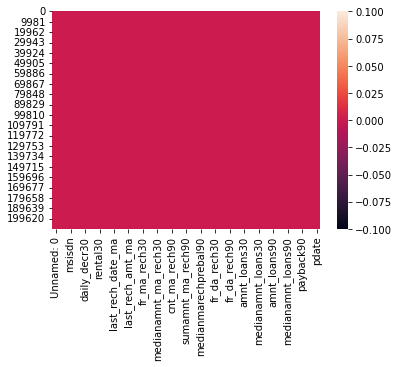

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.drop(columns=['Unnamed: 0','pcircle'],axis=1,inplace=True)

df.drop('msisdn',axis=1,inplace=True)

In [ ]:
df['pmonth']=pd.to_datetime(df['pdate'],format="%Y-%m-%d").dt.month
df['pday']=pd.to_datetime(df['pdate'],format="%Y-%m-%d").dt.day
df.drop('pdate',axis=1,inplace=True)

In [ ]:
df.drop(columns=['medianamnt_loans90','medianamnt_loans30','fr_da_rech90','last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90'],axis=1,inplace=True)

In [ ]:
df.describe().T

In [ ]:
df.loc[(df['maxamnt_loans30']!=6.0)&(df['maxamnt_loans30']!=12.0)&(df['maxamnt_loans30']

In [ ]:
df.loc[(df['maxamnt_loans30']!=6.0) & (df['maxamnt_loans30']!=12.0) &(df['maxamnt_lo

In [ ]:
df['maxamnt_loans30'].value_counts()

In [ ]:
df['maxamnt_loans90'].value_counts()

In [ ]:
df.drop(df[df['amnt_loans30']==0].index,inplace=True)

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical_features)

In [ ]:
plt.figure(figsize=(30,40))
plotnumber=1
for column in numerical_features:
    if plotnumber <=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
sns.countplot(df['label'])

In [ ]:
col=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'],y=df[col[i]],palette='magma')
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,30))
for i in range(len(col)):
    plt.subplot(8,4,i+1)
    sns.boxplot(df[col[i]], palette='icefire')
    plt.xlabel(col[i],fontsize =20)
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x="pday", hue='label', data=df, palette='rocket')
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()


In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x="pmonth", hue='label', data=df, palette='rocket')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('month')
plt.ylabel('Counting of Customers')
plt.show()

In [ ]:
df.hist(figsize=(20,20),color='r')
plt.show()

In [ ]:
featr=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_d

In [ ]:
from scipy.stats import zscore

z_score = zscore(df[['label']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



df.describe()

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(featr))
df_new=df[(z<3).all(axis=1)]
df_new.shape

In [ ]:
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('Total Number of Feature::', df.shape[1])
print('Number of categorical features::', len(cat_df))
print('Number of Numerical Feature::', len(num_df))

In [ ]:
corr_matrix = df.corr()
corr_matrix["label"].sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(24,18))
sns.heatmap(corr_matrix, annot=True, cmap='icefire')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
x = df.drop(columns = ["label"], axis=1)
y = df["label"]

x.skew()

In [ ]:
fetr=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

df[fetr] = pt.fit_transform(df[fetr].values)

In [ ]:
df[fetr].skew()

In [ ]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG',center=0,linewidth=0.5,fmt='0.2f')

In [ ]:
df_Price=df.loc[:,"label"]
count,bin_edges=np.histogram(df_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()

In [ ]:
x=df.drop('label',axis=1)
y=df['label']

y.value_counts()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1 = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x1.head()

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=42)

x_train.shape

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x.columns

vif.round(1)

Accuracy_score of train-test

In [ ]:
lg=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,shuffle=False,random_state=None)
clf=GridSearchCV(lg,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from collections import Counter
from imblearn.combine import SMOTETomek

In [ ]:
sm=SMOTETomek(0.9)
X_train_sm,Y_train_sm=sm.fit_resample(x_train,y_train)
print('before under resampling{}'.format(Counter(y_train)))
print('after under resampling{}'.format(Counter(Y_train_sm)))

In [ ]:
Y_train_sm.value_counts().plot(kind='bar')
plt.title('After resampling dataset')

In [ ]:
clf.fit(X_train_sm,Y_train_sm)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
dtc=DecisionTreeClassifier()
sgd=SGDClassifier()
xgb=XGBClassifier(eval_metric='logloss')

In [ ]:
def classifiers(f):
    f.fit(X_train_sm,Y_train_sm)
    print(f,'\n',f.score(X_train_sm,Y_train_sm)*100)
    f_pred=f.predict(x_test)
    scores=cross_val_score(f,X_train_sm,Y_train_sm,cv=5).mean()*100
    print('\n cross value score',scores)
    print('ACCURACY SCORE:\n',accuracy_score(y_test,f_pred)*100)
    print('ROC AUC SCORE:\n',roc_auc_score(y_test,f_pred)*100)
    print('CONFUSION MATRIX:\n',confusion_matrix(y_test,f_pred))
    print('CLASSIFICATION REPORT:\n',classification_report(y_test,f_pred))
    return

In [ ]:
classifiers(dtc)

In [ ]:
classifiers(sgd)

In [ ]:
classifiers(xgb)

In [ ]:
ensemble=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for i in ensemble:
    i.fit(X_train_sm,Y_train_sm)
    print(i,'\n score: ',i.score(X_train_sm,Y_train_sm)*100)
    pred=i.predict(x_test)
    print(' F1 score:',f1_score(y_test,pred)*100)
    print('Accuracy scoer:',accuracy_score(y_test,pred)*100)
    scores=cross_val_score(i,X_train_sm,Y_train_sm,cv=5).mean()*100
    print('\n Cross value score',scores)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    print('\n')

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=0,stop=100,num=10)]
max_features=['auto','sqrt','log2']
criterion=['gini','entropy']
max_depth=[2,4]
min_samples_split=[1,2]
bootstrap=[True,False]

In [ ]:
para_grid={'n_estimators':n_estimators,
          'max_features':max_features,
          'criterion':criterion,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'bootstrap':bootstrap}

In [ ]:
grid=GridSearchCV(RandomForestClassifier(),para_grid,n_jobs=-1)
grid.fit(X_train_sm,Y_train_sm)
grid.best_params_

In [ ]:
rf=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=None,max_features='sqrt',min_samples_split=7,n_estimators=77)
rf.fit(X_train_sm,Y_train_sm)
pred_rf=rf.predict(x_test)
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

In [ ]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)

In [ ]:
plt.plot([0,1],[0,1],'k--',label='AUC')
plt.plot(fpr,tpr,label='Random Forest Classifiers',color='orange',)
print("ROC AUC SCORE: ",roc_auc_score(y_test,pred_rf)*100)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest classification')
plt.legend()
plt.show()

In [ ]:
import joblib
joblib.dump(rf,'Microcredit.plk')

In [ ]:
model=joblib.load("Microcredit.plk")

In [ ]:
prediction = model.predict(x_test)
prediction=pd.DataFrame(prediction)
prediction